In [1]:
#练习7-可视化-探索泰坦尼克灾难数据

In [2]:
#步骤1 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#步骤2 从以下地址导入数据
path = './datas/train.csv'

In [5]:
#步骤3 将数据框命名为titanic
titanic = pd.read_csv(path)

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#步骤4 将PassengerId设置为索引
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#步骤5 绘制一个展示男女乘客比例的扇形图
titanic['Sex'] == 'male'#这是一个布尔数组
(titanic['Sex'] == 'male').sum() #布尔数组TRUE默认为1，调用聚合函数计算true的数量
males = (titanic['Sex'] == 'male').sum()

In [15]:
males #577

577

In [16]:
females = (titanic['Sex'] == 'female').sum()

In [17]:
females #314

314

In [18]:
proportions = [males, females]

In [19]:
proportions #[577, 314]

[577, 314]

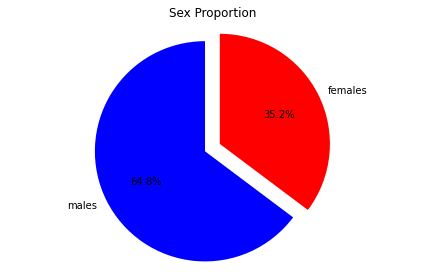

In [34]:
# Create a pie chart
plt.pie(proportions, labels=['males', 'females'], shadow=False, colors=['blue', 'red'], explode=(0.15,0), startangle=90, autopct='%1.1f%%')

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title('Sex Proportion')

## View the plot
plt.tight_layout()
plt.show()

(-5.0, 85.0)

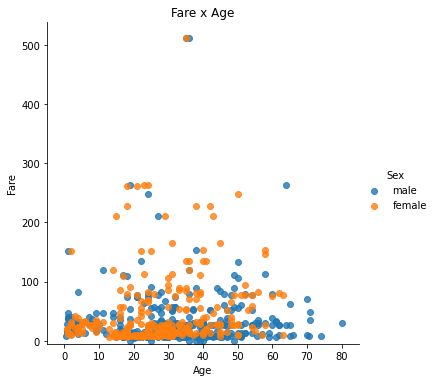

In [40]:
#步骤6 绘制一个展示船票Fare, 与乘客年龄和性别的散点图
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg = False)

lm.set(title = 'Fare x Age')

axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

In [43]:
#步骤7 有多少人生还？
titanic['Survived'].sum()

342

In [44]:
#步骤8 绘制一个展示船票价格的直方图
df = titanic['Fare'].sort_values(ascending = False)

In [45]:
df

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: Fare, Length: 891, dtype: float64

In [46]:
# create bins interval using numpy
binsval = np.arange(0,600,10)

In [47]:
binsval

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590])

In [48]:
# create the plot 传入数据集和bins区间即可

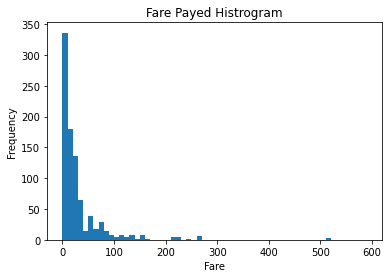

In [51]:
plt.hist(df, binsval)

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

plt.show()